In [9]:

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
import seaborn as sns
import pandas as pd

/tmp/ipython-input-1345569376.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [ ]:
i = np.array([8,5,-4])
w = np.array([0.5,0.3,0.2])
o = np.sign(i.dot(w)) #non linear sgn function

4.7


# Linear regression

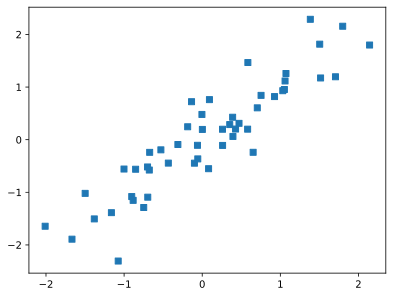

In [ ]:
#create data
N = 50
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2
plt.plot(x,y,'s')
plt.show()

In [ ]:
#build model
ANNreg = nn.Sequential(
    nn.Linear(1,1), #input layer
    #nn.ReLU(), #activation function
    nn.Linear(1,1) #output layer
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
#learning rate
learningRate = 0.05

#loss function
lossfun = nn.MSELoss()

#optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(ANNreg.parameters(),lr = learningRate )
#https://docs.pytorch.org/docs/stable/generated/torch.optim.SGD.html

In [ ]:
#train the model
numepochs = 500
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
  #forward pass
  yHat = ANNreg(x)

  #compute loss
  loss = lossfun(yHat,y)
  losses[epochi] = loss

  #backprop
  optimizer.zero_grad() #initialize all gradients to 0
  loss.backward() #backprop based on losses
  optimizer.step() #housekeeping functions of SGD

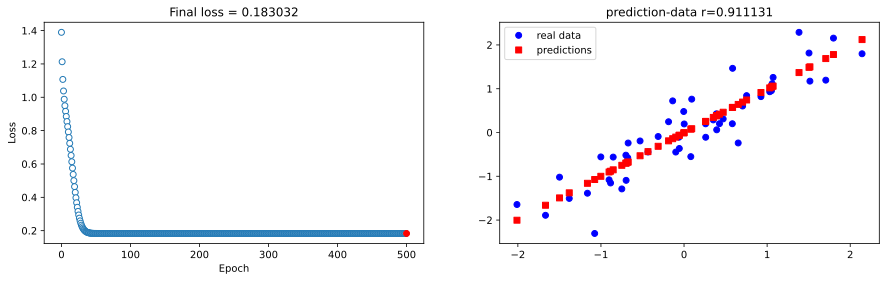

In [ ]:
#show the losses

#manually compute losses
#final forward pass
predictions = ANNreg(x)

#final loss (MSE)
testloss = (predictions - y).pow(2).mean()

fig,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].plot(losses.detach(),'o',markerfacecolor = 'w',linewidth = 0.1)
ax[0].plot(numepochs,testloss.detach(),'ro') #detach isolates loss value from gradient in output #testloss.item() returns scalar instead of tensor
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Final loss = %g' %testloss.item())

ax[1].plot(x,y,'bo',label = 'real data')
ax[1].plot(x,predictions.detach(),"rs", label = "predictions")
ax[1].set_title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:2f}')
ax[1].legend()

plt.show()


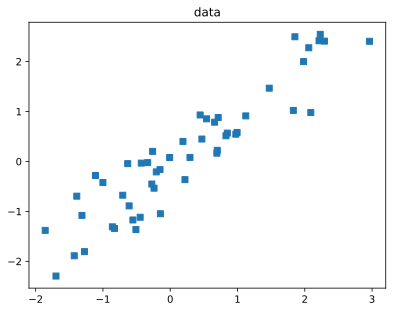

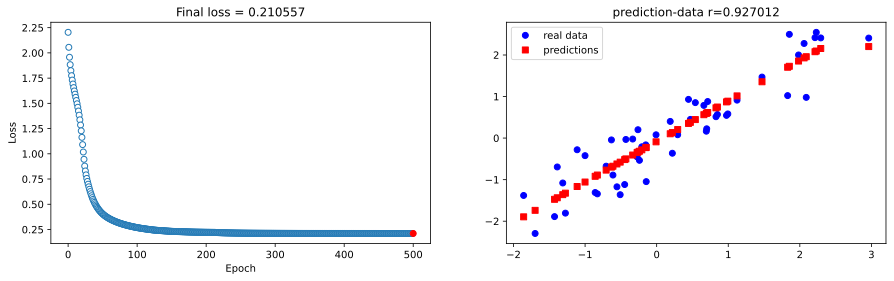

In [ ]:
def build_train_model(x,y,learningRate = 0.05, numepochs = 500):

  #build the model
  ANNreg = nn.Sequential(
    nn.Linear(1,1), #input layer
    nn.ReLU(), #activation function
    nn.Linear(1,1) #output layer
    )

  lossfun = nn.MSELoss()
  optimizer = torch.optim.SGD(ANNreg.parameters(),lr = learningRate )
  losses = torch.zeros(numepochs)

  #train the model
  for epochi in range(numepochs):
    #forward pass
    yHat = ANNreg(x)

    #compute loss
    loss = lossfun(yHat,y)
    losses[epochi] = loss

    #backprop
    optimizer.zero_grad() #initialize all gradients to 0
    loss.backward() #backprop based on losses
    optimizer.step() #housekeeping functions of SGD

  #final predictions and losses
  predictions = ANNreg(x)
  testloss = (predictions - y).pow(2).mean() #MSE

  return predictions,testloss,losses

def visualize_results (x,y,losses,testloss,predictions,numepochs=500):
  fig,ax = plt.subplots(1,2,figsize=(15,4))
  ax[0].plot(losses.detach(),'o',markerfacecolor = 'w',linewidth = 0.1)
  ax[0].plot(numepochs,testloss.detach(),'ro') #detach isolates loss value from gradient in output #testloss.item() returns scalar instead of tensor
  ax[0].set_xlabel('Epoch')
  ax[0].set_ylabel('Loss')
  ax[0].set_title('Final loss = %g' %testloss.item())

  ax[1].plot(x,y,'bo',label = 'real data')
  ax[1].plot(x,predictions.detach(),"rs", label = "predictions")
  ax[1].set_title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:2f}')
  ax[1].legend()

  plt.show()

def create_data(sample_size=50,slope = 1,visualize = 'no'):
  N = sample_size
  x = torch.randn(N,1)
  y = slope*x + torch.randn(N,1)/2

  if visualize =='yes':
    plt.plot(x,y,'s')
    plt.title("data")
    plt.show()
  return x,y


x,y = create_data(sample_size=50,slope = 1,visualize = 'yes')
predictions2,testloss2,losses2 = build_train_model(x,y)
visualize_results(x,y,losses2,testloss2,predictions2)

/tmp/ipython-input-1281382770.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  results[i,:]= mi,testloss.detach(),corr_ceff


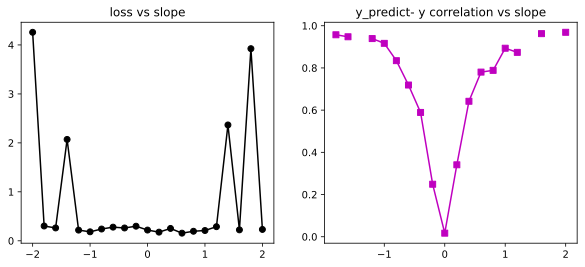

In [ ]:
m= np.linspace(-2,2,21)
results = np.zeros((len(m),3))
for i,mi in enumerate(m):
  x,y = create_data(sample_size=50,slope = mi)
  predictions,testloss,losses = build_train_model(x,y)
  corr_ceff = np.corrcoef(y.T,predictions.detach().T)[0,1]
  results[i,:]= mi,testloss.detach(),corr_ceff

fig,ax = plt.subplots(1,2,figsize = (10,4))
ax[0].plot(results[:,0],results[:,1],'ko-',label = "loss")
ax[0].set_title("loss vs slope")
ax[1].plot(results[:,0],results[:,2],'ms-',label = "correlation")
ax[1].set_title("y_predict- y correlation vs slope")
plt.show()
#losses are high due to lack of normalization

# Binary classification

Architecture :

 x1, x2 -> Linear unit -> ReLU -> Linear unit -> Sigmoid activation

 loss function = cross entropy

 Sigmoid function R-> R[0,1]

 https://en.wikipedia.org/wiki/Sigmoid_function

In [ ]:
# Numerical stability of sigmoid function
def sigmoid(x):
  return (1/(1+np.exp(-x)))

def one_minus_sigmoid(x):
  return (np.exp(-x)/(1+np.exp(-x)))

print(sigmoid(-750)) #overflow warning
print(one_minus_sigmoid(-750)) #nan
print(1 - sigmoid(-750))
print()

#https://www.programmersought.com/article/82853482956/

0.0
nan
1.0



/tmp/ipython-input-2469300882.py:8: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-x)))
/tmp/ipython-input-2469300882.py:11: RuntimeWarning: overflow encountered in exp
  return (np.exp(-x)/(1+np.exp(-x)))
/tmp/ipython-input-2469300882.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return (np.exp(-x)/(1+np.exp(-x)))


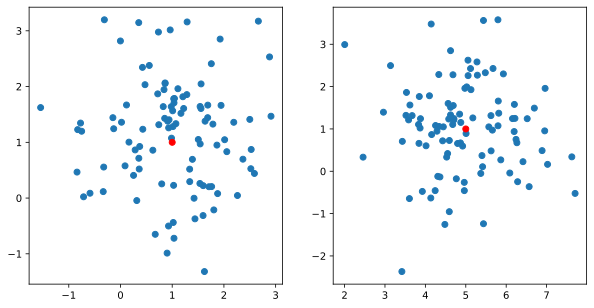

In [ ]:
#create dta
nPerClust = 100
blur = 1

A = [1,1]
B = [5,1]

a = [A[0] + np.random.randn (nPerClust)*blur,A[1] + np.random.randn (nPerClust)*blur]
b = [B[0] + np.random.randn (nPerClust)*blur,B[1] + np.random.randn (nPerClust)*blur]

## true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

#concatenate into matrix
data_np = np.hstack((a,b)).T

##convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig,ax = plt.subplots(1,2,figsize = [10,5])
ax[0].scatter(a[0],a[1])
ax[0].plot(A[0],A[1],'ro')
ax[1].scatter(b[0],b[1])
ax[1].plot(B[0],B[1],'ro')

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
ANNclassify = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1, 1),
    nn.Sigmoid())

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [ ]:
#other model features
learning_rate = 0.01

#loss function
#lossfun = nn.CrossEntropyLoss()
lossfun = nn.BCELoss()
#BCEwithLogitsLoss implements sigmoid function internally and is more numerically stable than other loss functions

#Optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learning_rate)

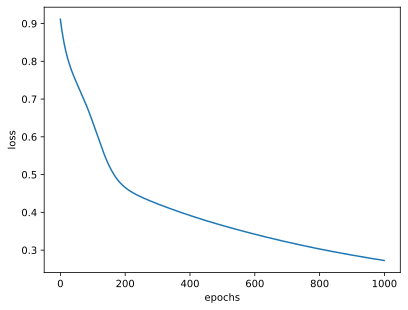

In [ ]:
#train the model
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

  #step1 - forward pass
  yhat = ANNclassify(data)

  #step2 - compute the loss
  loss = lossfun(yhat,labels)
  losses[epochi] = loss

  #step3 - backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

##plot the losses
plt.plot(losses.detach())
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
##compute the predictions

#final forward pass
predictions = ANNclassify(data)
predlabels = predictions >0.5

#finderrors
misclassified = np.where(predlabels!=labels)[0]

#totalaccuracy
totalacc = 100 - 100*len(misclassified)/(2*nPerClust)
print(f"final accuracy is {totalacc}")

final accuracy is 93.0


In [ ]:
data[misclassified]

tensor([[ 4.0880,  1.7035],
        [ 2.7487, -0.1308],
        [ 2.4889,  0.3577],
        [ 2.8512,  1.4640],
        [ 2.2843, -0.5414],
        [ 2.7778,  0.5951],
        [ 3.6137,  2.2901],
        [ 2.3952,  0.4859],
        [ 2.2775,  0.0212],
        [ 2.9604,  1.3469],
        [ 2.7583,  0.2161],
        [ 2.3497, -1.3895],
        [ 2.4727, -1.2549],
        [ 2.2871, -0.1523]])

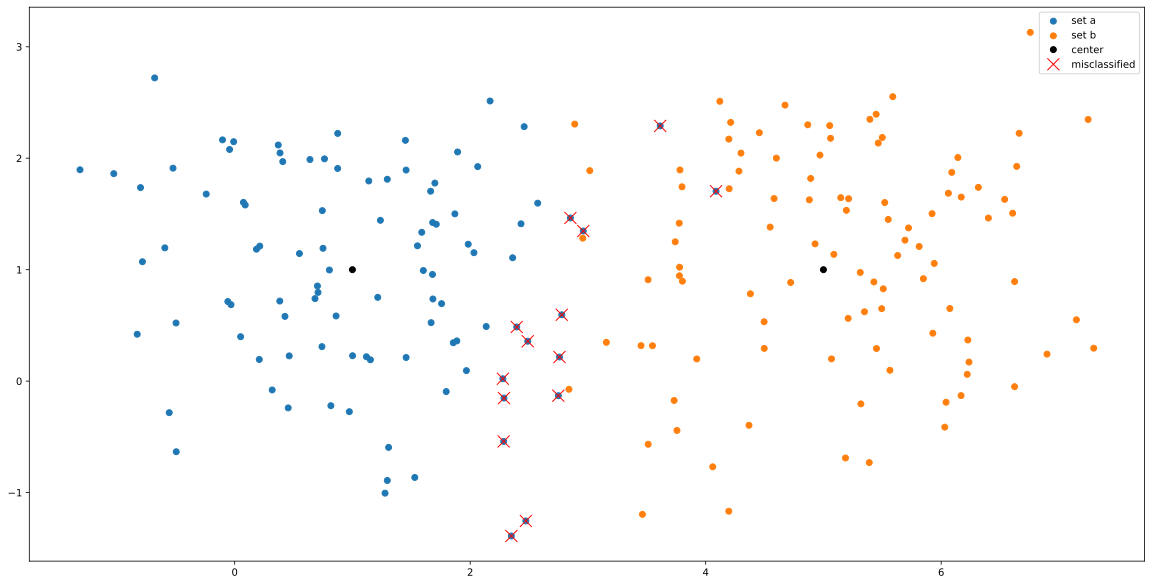

In [ ]:
plt.figure(figsize = (20,10))
plt.scatter(a[0],a[1],label = "set a")
plt.scatter(b[0],b[1],label = "set b")
plt.plot(A[0],A[1],"ko",label = "center")
plt.plot(B[0],B[1],"ko")
plt.plot(data[misclassified][:,0],data[misclassified][:,1],"rx",label = "misclassified",markersize = 12)
plt.legend()
plt.show()

In [ ]:
torch.save(ANNclassify.state_dict(), "ANNclassify.pth")
print("Saved PyTorch Model State to ANNclassify.pth")

Saved PyTorch Model State to ANNclassify.pth


# Refactoring code into callable functions

final accuracy % tensor(51.5000)


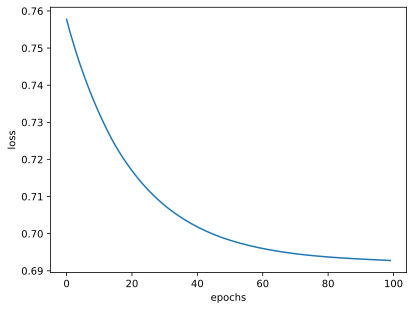

In [ ]:
def createANNmodel(learning_rate = 0.01):

  ANNclassify = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1, 1),
    ##nn.Sigmoid() using BCEwithLogitLoss that autoapplies the sigmoid
  )

  #loss function
  lossfun = nn.BCEWithLogitsLoss()

  #Optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learning_rate)

  return ANNclassify,lossfun,optimizer

def model_training(ANNclassify,lossfun,optimizer,data,labels,numepochs = 1000 ):
  losses = torch.zeros(numepochs)

  for epochi in range(numepochs):
    #step1 - forward pass
    yhat = ANNclassify(data)

    #step2 - compute the loss
    loss = lossfun(yhat,labels)
    losses[epochi] = loss

    #step3 - backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  #final forward pass
  predictions = ANNclassify(data)

  #compute total accuracy
  totalacc = 100*torch.mean(((predictions>0)== labels).float())

  return losses,predictions,totalacc

ANNclassify,lossfun,optimizer = createANNmodel(learning_rate = 0.1)
losses,predictions,totalacc = model_training (ANNclassify,lossfun,optimizer,data,labels,numepochs = 100)
print("final accuracy %",totalacc)
##plot the losses
plt.plot(losses.detach())
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# Parametric experiment - learning rate

Testing model performance on a range of learning rates

In [ ]:
## set of learning rates
learningrates = np.linspace(0.001,0.1,40)

## epochs
numepochs = 1000

## initialize output
accByLR = []
allLosses = np.zeros((len(learningrates),numepochs))

## loop through learning rates
for i,lr in enumerate(learningrates):
  ANNclassify,lossfun,optimizer = createANNmodel(learning_rate = lr)
  losses,predictions,totalacc = model_training (ANNclassify,lossfun,optimizer,data,labels,numepochs = numepochs)

  accByLR.append(totalacc)
  allLosses[i,:] = losses.detach()

/tmp/ipython-input-1861874790.py:17: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  allLosses[i,:] = losses.detach()


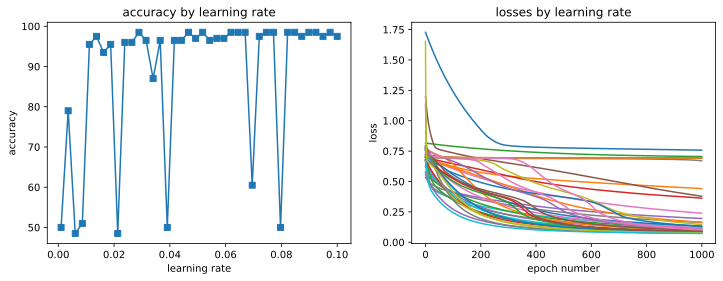

In [ ]:
fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(learningrates,accByLR,"s-")
ax[0].set_title("accuracy by learning rate")
ax[0].set_xlabel("learning rate")
ax[0].set_ylabel("accuracy")

ax[1].plot(allLosses.T)
ax[1].set_title("losses by learning rate")
ax[1].set_xlabel("epoch number")
ax[1].set_ylabel("loss")
plt.show()

In [ ]:
#proportion of experiment runs where the model had atleast 70%
sum(torch.tensor( accByLR)>70)*100/len(accByLR)

tensor(82.5000)

Detailed experiment to get more comprehensive view of learning rate

In [ ]:
# number of times to iterate through an experiment
numExps = 50

# matrix to store results
accMeta = np.zeros ((numExps,len(learningrates)))

#epochs (reducing to 500)
numepochs = 500

# experiment
for expi in range(numExps):
  for i,lr in enumerate(learningrates):

    ANNclassify,lossfun,optimizer = createANNmodel(learning_rate = lr)
    losses,predictions,totalacc = model_training (ANNclassify,lossfun,optimizer,data,labels,numepochs = numepochs)
    accMeta[expi,i] = totalacc

Text(0, 0.5, 'accuracy averaged over 50 experiments')

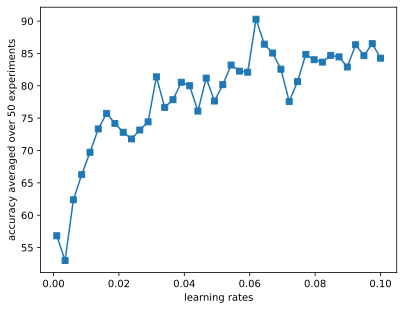

In [ ]:
avg_accuracy = accMeta.mean(axis=0)
plt.plot(learningrates,avg_accuracy,'s-')
plt.xlabel("learning rates")
plt.ylabel("accuracy averaged over 50 experiments")

#Adding hidden layers

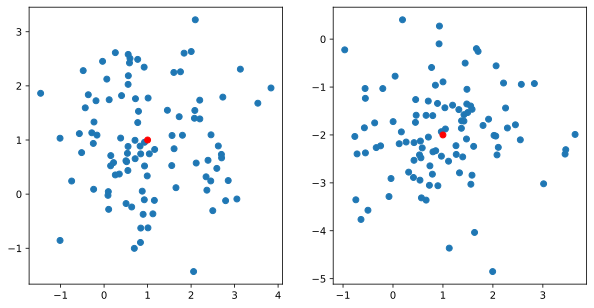

In [ ]:
#create dta
nPerClust = 100
blur = 1

A = [1,1]
B = [1,-2]

a = [A[0] + np.random.randn (nPerClust)*blur,A[1] + np.random.randn (nPerClust)*blur]
b = [B[0] + np.random.randn (nPerClust)*blur,B[1] + np.random.randn (nPerClust)*blur]

## true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

#concatenate into matrix
data_np = np.hstack((a,b)).T

##convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig,ax = plt.subplots(1,2,figsize = [10,5])
ax[0].scatter(a[0],a[1])
ax[0].plot(A[0],A[1],'ro')
ax[1].scatter(b[0],b[1])
ax[1].plot(B[0],B[1],'ro')

In [ ]:
ANNclassify = nn.Sequential(
    nn.Linear(2,16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid())

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=1, bias=True)
  (3): ReLU()
  (4): Linear(in_features=1, out_features=1, bias=True)
  (5): Sigmoid()
)

In [ ]:
#other model features
learning_rate = 0.01

#loss function
#lossfun = nn.CrossEntropyLoss()
lossfun = nn.BCELoss()
#BCEwithLogitsLoss implements sigmoid function internally and is more numerically stable than other loss functions

#Optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learning_rate)

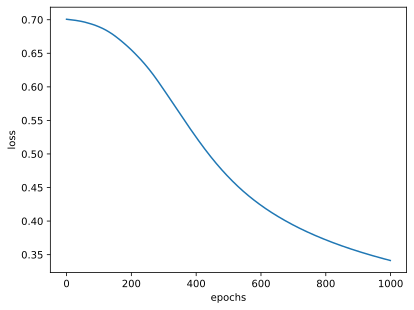

In [ ]:
#train the model
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

  #step1 - forward pass
  yhat = ANNclassify(data)

  #step2 - compute the loss
  loss = lossfun(yhat,labels)
  losses[epochi] = loss

  #step3 - backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

##plot the losses
plt.plot(losses.detach())
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
##compute the predictions

#final forward pass
predictions = ANNclassify(data)
predlabels = predictions >0.5

#finderrors
misclassified = np.where(predlabels!=labels)[0]

#totalaccuracy
totalacc = 100 - 100*len(misclassified)/(2*nPerClust)
print(f"final accuracy is {totalacc}")

final accuracy is 90.5


iterating over learning rates

final accuracy % tensor(93.)


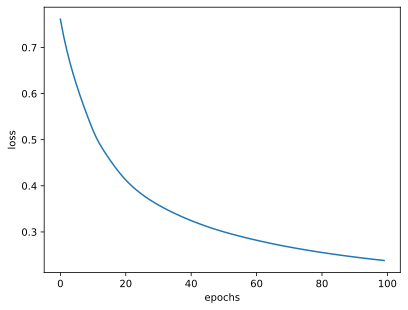

In [ ]:
def createANNmodel(learning_rate = 0.01):

  ANNclassify = nn.Sequential(
    nn.Linear(2,16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.ReLU(),
    nn.Linear(1,1))

  #loss function
  lossfun = nn.BCEWithLogitsLoss()

  #Optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learning_rate)

  return ANNclassify,lossfun,optimizer

def model_training(ANNclassify,lossfun,optimizer,data,labels,numepochs = 1000 ):
  losses = torch.zeros(numepochs)

  for epochi in range(numepochs):
    #step1 - forward pass
    yhat = ANNclassify(data)

    #step2 - compute the loss
    loss = lossfun(yhat,labels)
    losses[epochi] = loss

    #step3 - backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  #final forward pass
  predictions = ANNclassify(data)

  #compute total accuracy
  totalacc = 100*torch.mean(((predictions>0)== labels).float())

  return losses,predictions,totalacc

ANNclassify,lossfun,optimizer = createANNmodel(learning_rate = 0.1)
losses,predictions,totalacc = model_training (ANNclassify,lossfun,optimizer,data,labels,numepochs = 100)
print("final accuracy %",totalacc)
##plot the losses
plt.plot(losses.detach())
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
## set of learning rates
learningrates = np.linspace(0.001,0.1,40)

## epochs
numepochs = 1000

## initialize output
accByLR = []
allLosses = np.zeros((len(learningrates),numepochs))

## loop through learning rates
for i,lr in enumerate(learningrates):
  ANNclassify,lossfun,optimizer = createANNmodel(learning_rate = lr)
  losses,predictions,totalacc = model_training (ANNclassify,lossfun,optimizer,data,labels,numepochs = numepochs)

  accByLR.append(totalacc)
  allLosses[i,:] = losses.detach()

/tmp/ipython-input-1861874790.py:17: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  allLosses[i,:] = losses.detach()


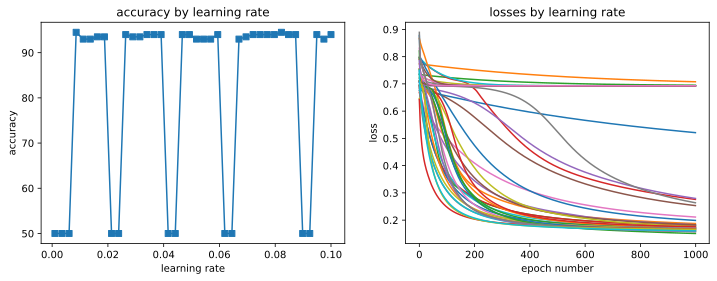

In [ ]:
fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(learningrates,accByLR,"s-")
ax[0].set_title("accuracy by learning rate")
ax[0].set_xlabel("learning rate")
ax[0].set_ylabel("accuracy")

ax[1].plot(allLosses.T)
ax[1].set_title("losses by learning rate")
ax[1].set_xlabel("epoch number")
ax[1].set_ylabel("loss")
plt.show()

In [ ]:
#proportion of experiment runs where the model had atleast 70%
sum(torch.tensor( accByLR)>70)*100/len(accByLR)

tensor(72.5000)

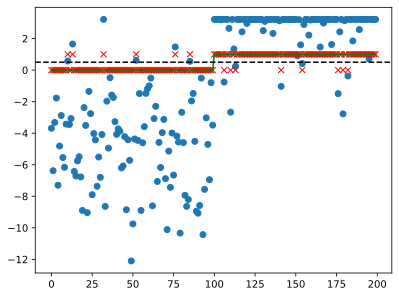

In [ ]:
plt.plot(predictions.detach(),'o')
plt.plot(predictions.detach()>0.5,"rx")
plt.plot(labels,color = "g")
plt.axhline(0.5,linestyle = "--",color = 'k') # Use axhline for a horizontal line
plt.show() # Add plt.show() to display the plot

#Linear models

In [ ]:
#removing non linearities significantly improve performance . This indicates non linear models are not suited for linear problems
def createANNmodel(learning_rate = 0.01):

  ANNclassify = nn.Sequential(
    nn.Linear(2,16),
    #nn.ReLU(),
    nn.Linear(16, 1),
    #nn.ReLU(),
    nn.Linear(1,1))

  #loss function
  lossfun = nn.BCEWithLogitsLoss()

  #Optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learning_rate)

  return ANNclassify,lossfun,optimizer

def model_training(ANNclassify,lossfun,optimizer,data,labels,numepochs = 1000 ):
  losses = torch.zeros(numepochs)

  for epochi in range(numepochs):
    #step1 - forward pass
    yhat = ANNclassify(data)

    #step2 - compute the loss
    loss = lossfun(yhat,labels)
    losses[epochi] = loss

    #step3 - backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  #final forward pass
  predictions = ANNclassify(data)

  #compute total accuracy
  totalacc = 100*torch.mean(((predictions>0)== labels).float())

  return losses,predictions,totalacc

ANNclassify,lossfun,optimizer = createANNmodel(learning_rate = 0.1)
losses,predictions,totalacc = model_training (ANNclassify,lossfun,optimizer,data,labels,numepochs = 100)
print("final accuracy %",totalacc)
##plot the losses
plt.plot(losses.detach())
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

/tmp/ipython-input-3486399639.py:17: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  allLosses[i,:] = losses.detach()


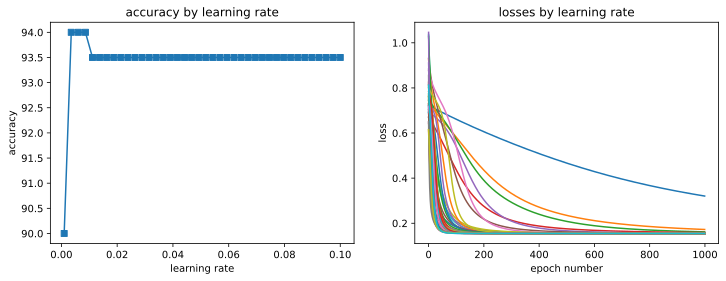

In [ ]:
## set of learning rates
learningrates = np.linspace(0.001,0.1,40)

## epochs
numepochs = 1000

## initialize output
accByLR = []
allLosses = np.zeros((len(learningrates),numepochs))

## loop through learning rates
for i,lr in enumerate(learningrates):
  ANNclassify,lossfun,optimizer = createANNmodel(learning_rate = lr)
  losses,predictions,totalacc = model_training (ANNclassify,lossfun,optimizer,data,labels,numepochs = numepochs)

  accByLR.append(totalacc)
  allLosses[i,:] = losses.detach()

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(learningrates,accByLR,"s-")
ax[0].set_title("accuracy by learning rate")
ax[0].set_xlabel("learning rate")
ax[0].set_ylabel("accuracy")

ax[1].plot(allLosses.T)
ax[1].set_title("losses by learning rate")
ax[1].set_xlabel("epoch number")
ax[1].set_ylabel("loss")
plt.show()

final accuracy is 93.5


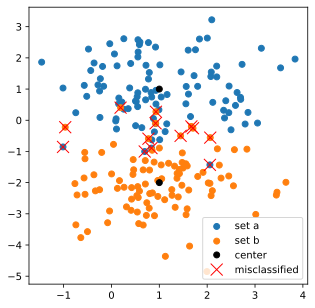

In [ ]:
##compute the predictions

#final forward pass
predictions = ANNclassify(data)
predlabels = predictions >0.5

#finderrors
misclassified = np.where(predlabels!=labels)[0]

#totalaccuracy
totalacc = 100 - 100*len(misclassified)/(2*nPerClust)
print(f"final accuracy is {totalacc}")

plt.figure(figsize = (5,5))
plt.scatter(a[0],a[1],label = "set a")
plt.scatter(b[0],b[1],label = "set b")
plt.plot(A[0],A[1],"ko",label = "center")
plt.plot(B[0],B[1],"ko")
plt.plot(data[misclassified][:,0],data[misclassified][:,1],"rx",label = "misclassified",markersize = 12)
plt.legend()
plt.show()

#Multi-output ANN

In [130]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


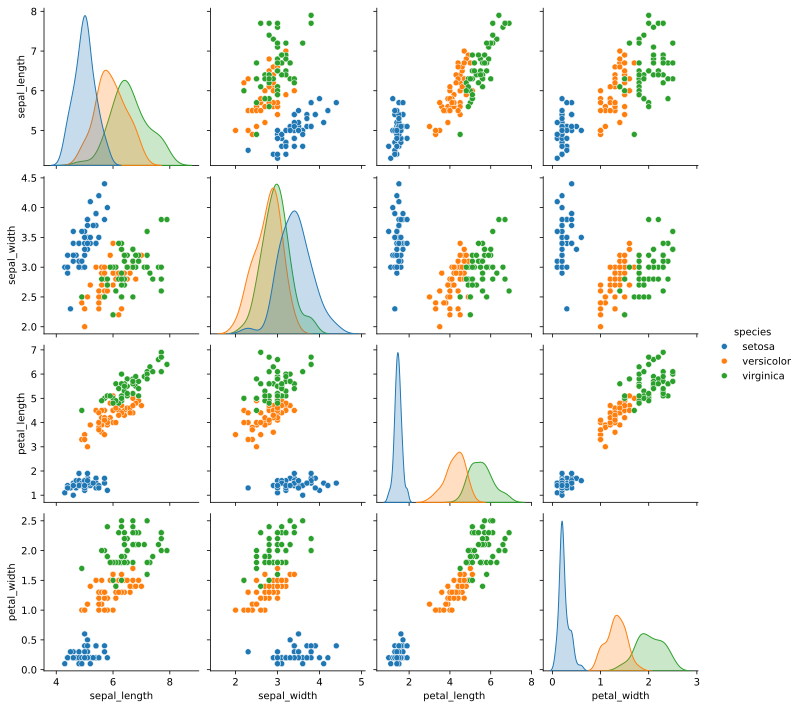

In [ ]:
sns.pairplot(iris,hue = 'species')
plt.show()

In [131]:
data = iris[iris.columns[0:4]]
data_tensor = torch.tensor(data.values).float()#reshape(1,150,4)
print("training data:")
print(data.head(2))
print(data_tensor.shape)
print(data_tensor[0:2])

#data_labels = iris[iris.columns[-1]]
#data_labels_encoded = pd.get_dummies(data_labels, columns=['species'], prefix='species').astype(int)
#print(data_labels_encoded.iloc[45:55])
print("\nlabels:")
labels = torch.zeros(len(data),dtype=torch.long) #setosa is 0
labels[iris["species"]=="versicolor"] = 1
labels[iris["species"]=="virginica"] = 2
labels #data must be randomized to avoid introducign systemic bias

training data:
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
torch.Size([150, 4])
tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000]])

labels:


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [141]:
iris_model = nn.Sequential(nn.Linear(4,64),
                           nn.ReLU(),
                           nn.Linear(64,64),
                           nn.ReLU(),
                           nn.Linear(64,3))


learning_rate = 0.01
loss_fun = nn.CrossEntropyLoss()#computes log softmax #https://docs.pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
optimizer = torch.optim.SGD(iris_model.parameters(),lr = learning_rate)

iris_model

Sequential(
  (0): Linear(in_features=4, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=3, bias=True)
)

In [142]:
#training
epochs = 1000
loss_consolidated = torch.zeros(epochs)
#loss_consolidated2 = np.zeros(epochs)
ongoing_acc = []

for epochi in range(epochs):
  pred = iris_model(data_tensor)
  loss = loss_fun(pred,labels)
  loss_consolidated[epochi] = loss
  #loss_consolidated2[epochi] = loss

  optimizer.zero_grad() #initialize all gradients to 0
  loss.backward() #backprop based on losses
  optimizer.step() #housekeeping functions of SGD

  #compute accuracy
  matches = torch.argmax(pred,axis=1)==labels
  matches_numeric = matches.float()
  accuracy_pct = 100*torch.mean(matches_numeric)
  ongoing_acc.append(accuracy_pct)

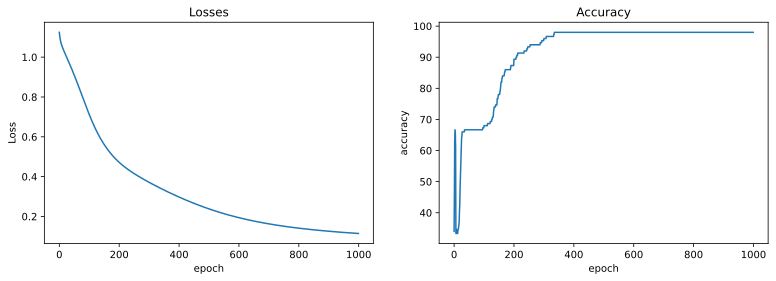

In [143]:
# report accuracy
fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(loss_consolidated.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoing_acc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()
# run training again to see whether this performance is consistent

In [119]:
pred.shape

torch.Size([150, 3])

In [113]:
pred = iris_model(data_tensor)
pred[0:5]

tensor([[  8.7091,   3.3035, -13.2405],
        [  7.6919,   3.0769, -11.9142],
        [  8.0218,   3.0499, -12.2025],
        [  7.3002,   2.9730, -11.3699],
        [  8.7397,   3.2879, -13.2449]], grad_fn=<SliceBackward0>)

#Concepts

Separating hyperplane
- is a boundary that binarises and categorises data.
- It is used as a decision boundary

Feature space
- is a graphical representation where,
- each axis is a dimension of the data,
- and each point (scatter point) represents input data values

Backpropagation
- error signal needs to propagate backward through each node
- back propagation is just gradient descent
- chain rule of derivatives is used
- x-axis is now the weights axis
- its essentially gradient descent in multi dimensions

Hyperparameter Tuning
- Learning rate (step size) vs. Training epochs(iterations)